<a href="https://colab.research.google.com/github/CRMawande/data_science_internship_bharat_intern/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [8]:
#Import the Boston House Price Prediction
df = pd.read_csv('BostonHousing.csv')

In [17]:
#View basic information
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [16]:
#renaming column medv to price
df = df.rename(columns={'medv':'price'})

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [19]:
df.shape

(506, 14)

In [20]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [21]:
#Check for missing values
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64

<Axes: >

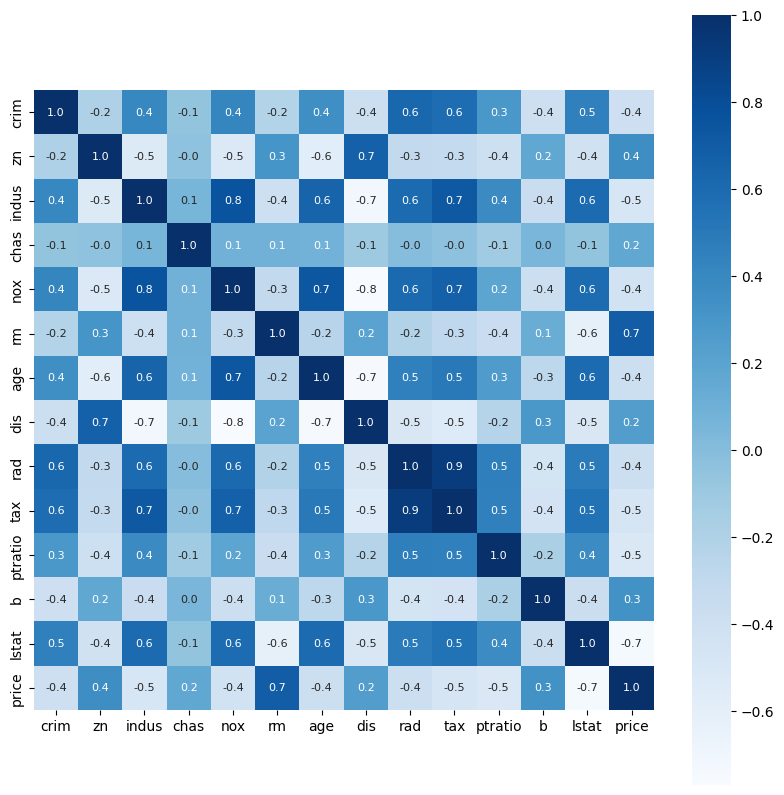

In [22]:
#correlation analysis
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [25]:
#Split the data into X and Y
X = df.drop(['price'], axis = 1)
y = df['price']

In [26]:
X,y

(        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
 0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
 1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
 2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
 3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
 4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
 ..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
 501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
 502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
 503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
 504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
 505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   
 
      ptratio       b  lstat  
 0       15.3  396.90   4.98  
 1       17.8  396.90   9.14  
 2       17.8  39

In [41]:
#Split the data into Training data and Test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [42]:
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [32]:
#Train the model 1: Using Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
#Lets look at our coefficients
model.intercept_, model.coef_

(30.24675099392366,
 array([-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,  2.78443820e+00,
        -1.72026334e+01,  4.43883520e+00, -6.29636221e-03, -1.44786537e+00,
         2.62429736e-01, -1.06467863e-02, -9.15456240e-01,  1.23513347e-02,
        -5.08571424e-01]))

In [34]:
coef = pd.DataFrame(model.coef_, X.columns, columns =['Coef'])
print(coef) #higher the coef value the more important it is

              Coef
crim     -0.113056
zn        0.030110
indus     0.040381
chas      2.784438
nox     -17.202633
rm        4.438835
age      -0.006296
dis      -1.447865
rad       0.262430
tax      -0.010647
ptratio  -0.915456
b         0.012351
lstat    -0.508571


In [35]:
#Predictions
y_pred = model.predict(X_test)

In [36]:
y_pred

array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992,
       23.25442929, 17.66253818, 14.34119   , 23.01320703, 20.63245597,
       24.90850512, 18.63883645, -6.08842184, 21.75834668, 19.23922576,
       26.19319733, 20.64773313,  5.79472718, 40.50033966, 17.61289074,
       27.24909479, 30.06625441, 11.34179277, 24.16077616, 17.86058499,
       15.83609765, 22.78148106, 14.57704449, 22.43626052, 19.19631835,
       22.43383455, 25.21979081, 25.93909562, 17.70162434, 16.76911711,
       16.95125411, 31.23340153, 20.13246729, 23.76579011, 24.6322925 ,
       13.94204955, 32.25576301, 42.67251161, 17.32745046, 27.27618614,
       16.99310991, 14.07009109, 25.90341861, 20.29485982, 29.95339638,
       21.28860173, 34.34451856, 16.04739105, 26.22562412, 39.53939798,
       22.57950697, 18.84531367, 32.72531661, 25.0673037 , 12.88628956,
       22.68221908, 30.48287757, 31.52626806, 15.90148607, 20.22094826,
       16.71089812, 20.52384893, 25.96356264, 30.61607978, 11.59

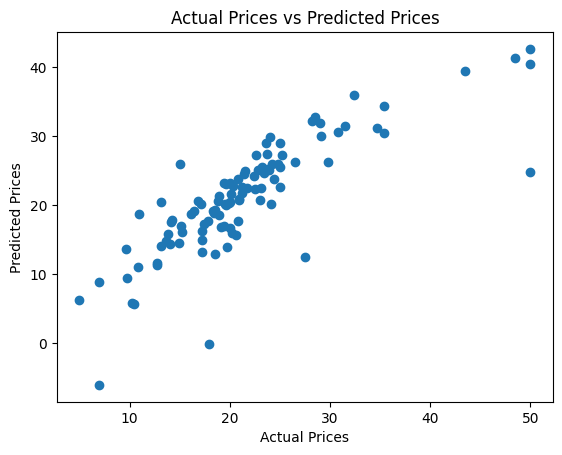

In [37]:
#Plot the above predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [39]:
#Performance Metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 3.189091965887837
MSE: 24.291119474973478
RMSE: 4.928602182665332


In [43]:
#Train the model 2: Using XGBoost
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [46]:
#Predictions
y_pred = model.predict(X_test)

In [47]:
y_pred

array([24.276764 , 30.46075  , 17.959005 , 22.965069 , 17.133715 ,
       22.163433 , 18.669397 , 15.236069 , 21.046127 , 20.459925 ,
       22.439089 , 18.89959  , 11.203732 , 21.811333 , 18.655327 ,
       26.25912  , 21.139784 ,  9.210471 , 47.378334 , 15.913627 ,
       25.087412 , 26.079153 , 13.452615 , 21.082066 , 15.193554 ,
       15.992098 , 20.690847 , 13.094459 , 21.131876 , 21.168287 ,
       18.848736 , 23.033901 , 14.877705 , 21.35931  , 15.263533 ,
       14.96528  , 33.754707 , 19.01804  , 22.69863  , 24.285683 ,
       19.455326 , 27.735622 , 47.043087 , 19.217285 , 21.663893 ,
       14.770664 , 13.908811 , 23.762539 , 17.538256 , 25.872328 ,
       22.392021 , 35.081337 , 17.318087 , 27.144457 , 45.176407 ,
       21.917618 , 16.05219  , 30.757784 , 22.377308 , 19.42954  ,
       25.34448  , 34.943123 , 30.451046 , 17.93282  , 25.573687 ,
       17.035986 , 14.910609 , 22.595358 , 27.416218 , 14.8786125,
       20.446955 , 30.664629 ,  9.616146 , 21.455444 , 22.9409

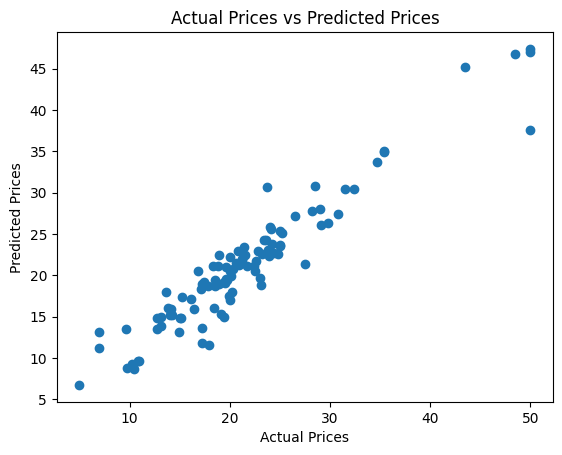

In [48]:
#Plot the above predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [49]:
#Performance Metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.8908873698290656
MSE: 6.909231565384943
RMSE: 2.62854171840299
